<a href="https://colab.research.google.com/github/Sakshipingale13/DSBDA-Practical/blob/main/DSBDA_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: SAKSHI SONBA PINGALE
    
  Roll No. 49

Assignment No.-5 ::
Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset. https://www.kaggle.com/c/boston-housing/data?select=train.csv
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0


In [ ]:
# Data Preprocessing
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

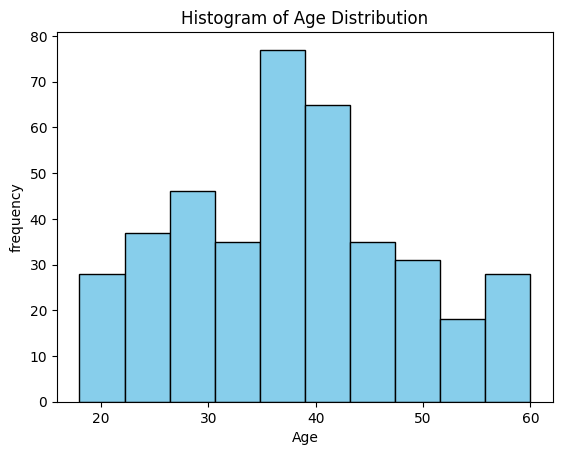

In [ ]:
# this code creates a visual representation of the distribution of ages in the dataset. It shows how many individuals fall
# into different age ranges,making it easier to understand the overall age distribution of the data.
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Histogram of Age Distribution')
plt.show()

This histogram illustrates that the most common age range in the dataset falls between approximately 35 to 43 or 44 years old.





In [ ]:
# This line of code replaces the values in the 'Gender' column of the dataset. It changes "Female" to 0 and "Male" to 1,
# essentially converting categorical gender labels into numerical values.
data['Gender'].replace({"Female": 0, "Male": 1},inplace=True)

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
# prepare a data for logistic regression
# x=train=independent variables that will be used to predict the target variable.
# y=target=the variable we want to predict.
x=data[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y=data[['Purchased']]

# Logistic Model Building


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xTest, xTrain , yTest, yTrain= train_test_split(x,y,test_size=0.2,random_state=13)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# The higher the score, the better the model's performance.
# The purpose of the score method in machine learning is to provide a measure of how well the model performs on unseen data.
score = model.score(xTest, yTest)
print(score)

0.625


In [ ]:
yPred=model.predict(xTest)

# Model Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# These metrics help you understand how well your model is performing in terms of making correct and incorrect predictions on a given dataset.


In [ ]:
# The purpose of computing and printing the confusion matrix is to evaluate the performance of a classification model.
conf_mat=confusion_matrix(yTest,yPred)
print(conf_mat)


[[200   0]
 [120   0]]


In [ ]:
print(f"TN value is {conf_mat[0][0]}")
print(f"FP value is {conf_mat[0][1]}")
print(f"FN value is {conf_mat[1][0]}")
print(f"TP value is {conf_mat[1][1]}")

TN value is 200
FP value is 0
FN value is 120
TP value is 0


In [ ]:
# A measure of how often the model makes correct predictions.
print(f"The accuracy  is {accuracy_score(yTest,yPred)}")

The accuracy  is 0.625


In [ ]:
# A measure of how many of the predicted positive instances are actually positive.
print(f"The Precison is  {precision_score(yTest, yPred)}")

The Precison is  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# A measure of how many of the actual positive instances are correctly predicted as positive by the model.
print(f"The recall is {recall_score(yTest,yPred)}")

The recall is 0.0


In [ ]:
# A measure of how often the model makes incorrect predictions.
print(f"The error rate is {1-accuracy_score(yTest, yPred)}")

The error rate is 0.375
